In [39]:
!pip install pydmd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


in001213.jpg


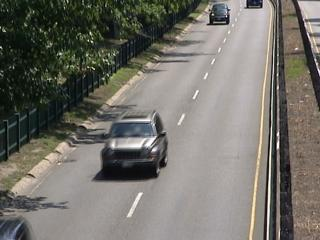

in001209.jpg


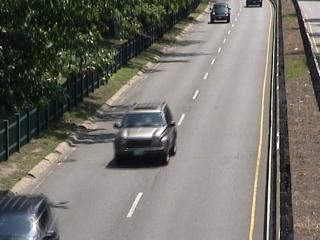

in001211.jpg


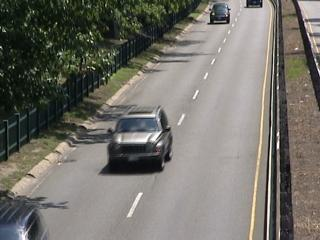

in001207.jpg


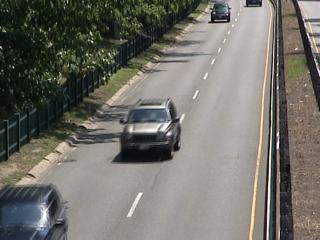

in001206.jpg


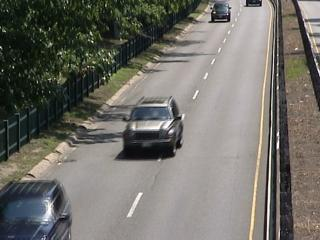

in001208.jpg


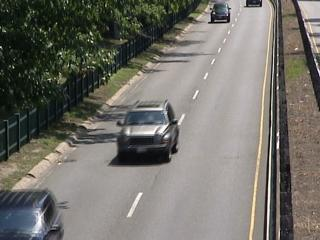

in001210.jpg


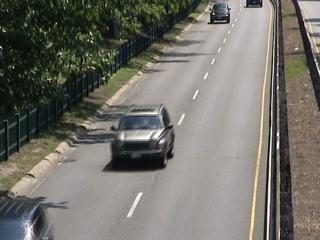

in001204.jpg


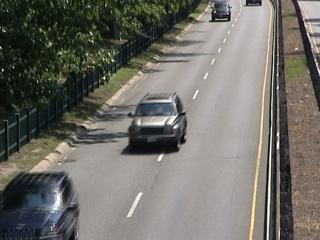

in001205.jpg


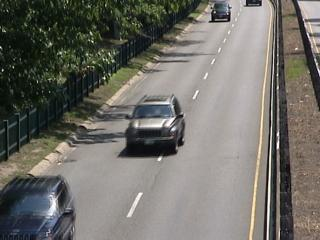

in001201.jpg


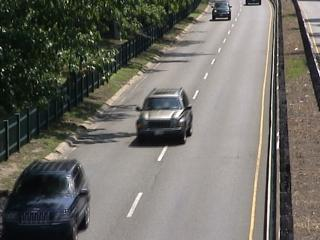

in001203.jpg


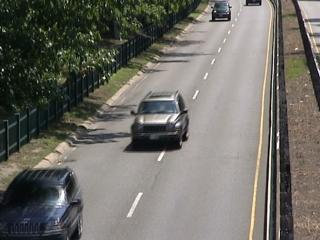

in001214.jpg


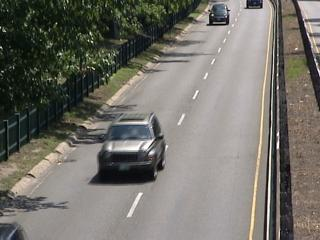

in001202.jpg


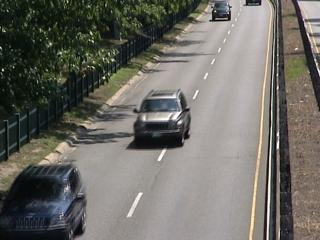

in001212.jpg


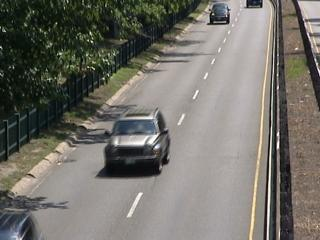

in001228.jpg


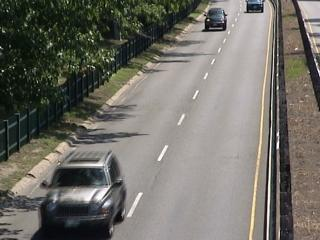

in001223.jpg


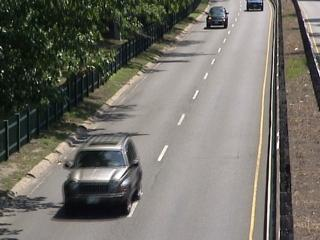

in001222.jpg


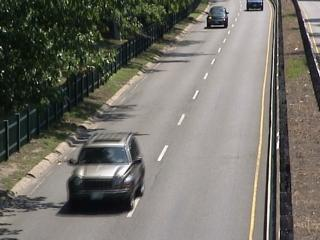

in001224.jpg


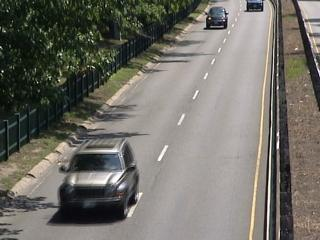

in001229.jpg


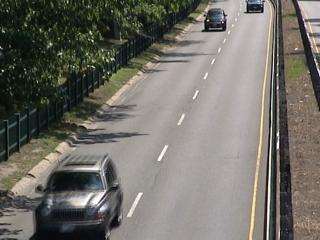

in001218.jpg


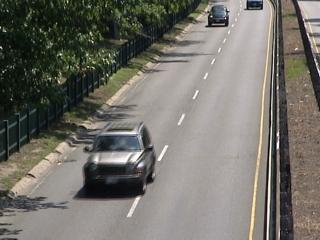

in001225.jpg


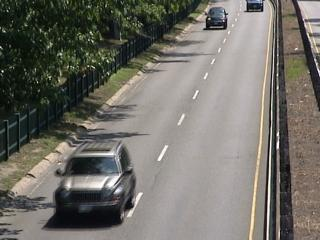

in001216.jpg


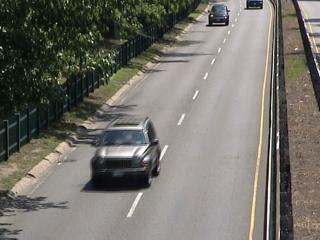

in001219.jpg


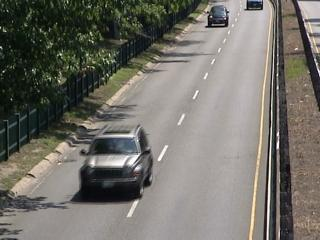

in001226.jpg


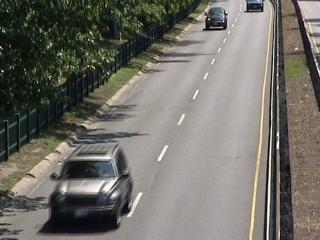

in001217.jpg


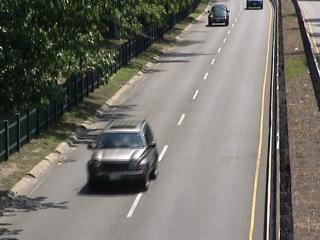

in001221.jpg


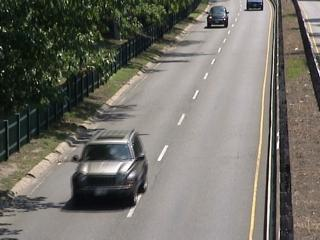

in001230.jpg


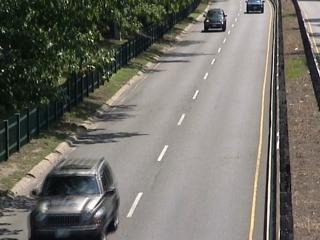

in001227.jpg


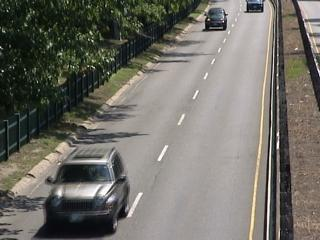

in001215.jpg


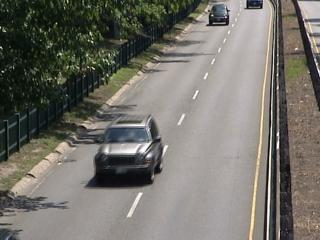

in001220.jpg


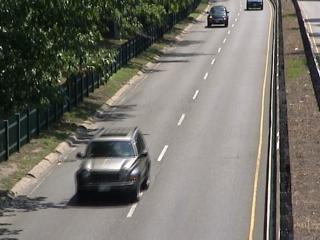

In [3]:
from IPython.display import Image # displaying images (30 Frames being used in DMD algorithm)
import os
path = r'/content/drive/MyDrive/Colab Notebooks/project data'
for i in os.listdir(path):
    print(i)
    display(Image(path + '/' + i))

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
import numpy as np
from pydmd import DMD

path = r'/content/drive/MyDrive/Colab Notebooks/snapshots.csv.xls' # uploading snapshots csv file
main_arr = pd.read_csv(path).to_numpy()
print(main_arr.shape) # main matrix to be used for DMD
display(main_arr) # m = 30, n = 11520
X_1,X_2 = main_arr.T[:-1,:],main_arr.T[1:,:]
print(X_1.T,'\n',X_1.T.shape,'\n',X_2.T,'\n',X_2.T.shape)
x_1 = np.array(X_1[0]) # first flattened snapshot 
print(x_1.T,'\n',x_1.T.shape)

(11520, 30)


array([[ 45.,  46.,  45., ...,  39.,  42.,  47.],
       [ 38.,  37.,  36., ...,  35.,  35.,  35.],
       [ 28.,  24.,  25., ...,  26.,  26.,  28.],
       ...,
       [129., 128., 127., ..., 129., 131., 129.],
       [109., 109., 106., ..., 111., 109., 107.],
       [107., 106., 109., ..., 104., 107., 107.]])

[[ 45.  46.  45. ...  47.  39.  42.]
 [ 38.  37.  36. ...  37.  35.  35.]
 [ 28.  24.  25. ...  28.  26.  26.]
 ...
 [129. 128. 127. ... 127. 129. 131.]
 [109. 109. 106. ... 110. 111. 109.]
 [107. 106. 109. ... 108. 104. 107.]] 
 (11520, 29) 
 [[ 46.  45.  41. ...  39.  42.  47.]
 [ 37.  36.  38. ...  35.  35.  35.]
 [ 24.  25.  21. ...  26.  26.  28.]
 ...
 [128. 127. 131. ... 129. 131. 129.]
 [109. 106. 108. ... 111. 109. 107.]
 [106. 109. 105. ... 104. 107. 107.]] 
 (11520, 29)
[ 45.  38.  28. ... 129. 109. 107.] 
 (11520,)


In [12]:
t_0, t_end, dt = 0,1,1/30 # t_0 - time of first snapshot;t_end - time of last snapshot; dt - delta time between the snapshots.
dmd = DMD(svd_rank=29)
dmd.fit(main_arr) #  fitting DMD onto matrix, using parameter l = m - 1 = 29
t = [i for i in range(0,30)] # time vector
print(t,len(t))
# x = dmd.reconstructed_data
# print(x[:,0].shape)
# X = np.reshape(x[:,0],(120,96))
# print(X.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] 30


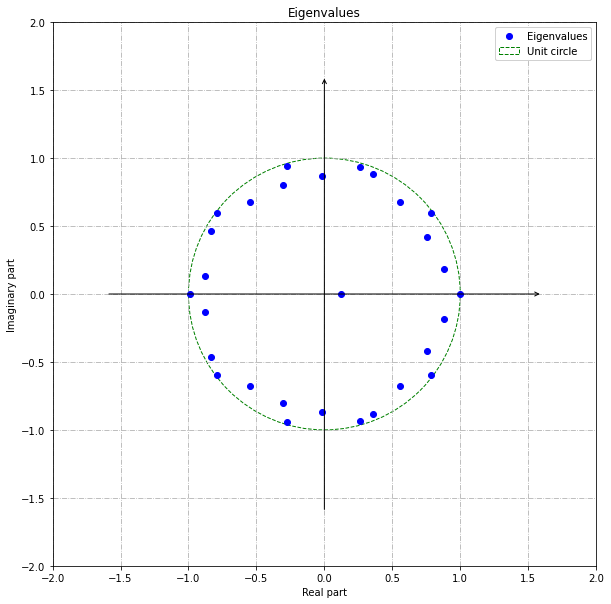

(29,) (29,)
[0.00038807575255492326] 
 [3.1416034449399013, 2.9952516488963425, 2.9952516488963425, 2.631571572463047, 2.631571572463047, 2.493104054070657, 2.493104054070657, 0.23527301592259542, 0.23527301592259542, 0.6536988486952992, 0.6536988486952992, 0.5269898613501516, 0.5269898613501516, 0.8893736992511266, 0.8893736992511266, 1.1847350670120922, 1.1847350670120922, 1.296232290087305, 1.296232290087305, 2.2559073000274896, 2.2559073000274896, 1.5987838343144563, 1.5987838343144563, 1.856659211722226, 1.856659211722226, 1.9438988169037823, 1.9438988169037823, 2.080729016775482]
(29, 29)
(29, 29, 29)


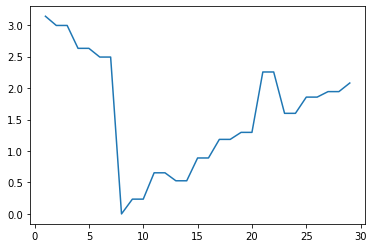

In [13]:
import cmath # math for complex no.
dmd.plot_eigs(figsize=(10, 10), title='Eigenvalues') # eigenvalues of A tilde (\mu_{j})
f_modes = [cmath.log(i) for i in dmd.eigs] # this is fourier modes w_{j} = ln(\mu_j)/delta_t
f_modes_abs = [abs(i) for i in f_modes] # absolute values of f_modes
print(np.array(f_modes).shape,dmd.eigs.shape)
# print(f_modes_abs)
# eigs_abs = [abs(i) for i in dmd.eigs] # absolute values of f_modes
# print(np.argmin(eigs_abs),np.argmin(f_modes_abs))
plt.plot(t[1:],f_modes_abs)
bg_modes, fg_modes = [],[]
limit = 0.1 # threshold to seperate fourier modes into foreground and background video part
for i in f_modes_abs:
  if i >= limit:
    fg_modes.append(i) # this will form foreground video part
  else:
    bg_modes.append(i) # this will form background video part
print(bg_modes,'\n', fg_modes)
# print(len(f_modes_abs),np.argmin(f_modes_abs))
Ohm = np.diag([cmath.exp(i) for i in f_modes]) # this is diagonal matrix of exponent of fourier modes
print(Ohm.shape)
Ohm_time_list = [np.linalg.matrix_power(Ohm,i) for i in t[1:]]
print(np.array(Ohm_time_list).shape)

In [35]:
# print(len(dmd.modes[0]),dmd.modes[0]) # the eigenvectors of A tilda (Matrix Phi of eigenvectors)
print(dmd.modes.shape)
b = np.dot(np.linalg.pinv(dmd.modes),x_1) # initial amplitudes of modes
print(b.shape)
print(np.dot(dmd.modes,b).real,x_1) # x_1 (1st snapshot) = pseudo_inverse(Phi) * b
exp_vector = [cmath.exp(f_modes[np.argmin(f_modes_abs)]*i) for i in t[1:]]
print(np.array(exp_vector).shape,dmd.modes.shape)
# print(b[np.argmin(f_modes_abs)],len(dmd.modes[np.argmin(f_modes_abs)]),len(exp_vector),'\n')
x_low_rank = b[np.argmin(f_modes_abs)]*np.outer(dmd.modes[np.argmin(f_modes_abs)],exp_vector) 
print(x_low_rank.shape)

x_dmd = np.zeros(shape = x_low_rank.shape)
for i in range(len(Ohm_time_list)):
  x_dmd += (b[i].real)*(dmd.modes[i].real)*(cmath.exp(f_modes[i]*t[i]).real) # main x_dmd
print(x_dmd)

(11520, 29)
(29,)
[ 45.  38.  28. ... 129. 109. 107.] [ 45.  38.  28. ... 129. 109. 107.]
(29,) (11520, 29)
(29, 29)
[[  9.32401876  -7.44964025  -7.44964025  -0.13461383  -0.13461383
    6.18190638   6.18190638  39.32919695   8.74642334   8.74642334
   19.73147064  19.73147064 -13.68044325 -13.68044325 -22.82749736
  -22.82749736  -8.25368746  -8.25368746   4.69224405   4.69224405
  -17.03750159 -17.03750159   6.7982885    6.7982885    5.11520325
    5.11520325   8.27577089   8.27577089 -23.71293374]
 [  9.32401876  -7.44964025  -7.44964025  -0.13461383  -0.13461383
    6.18190638   6.18190638  39.32919695   8.74642334   8.74642334
   19.73147064  19.73147064 -13.68044325 -13.68044325 -22.82749736
  -22.82749736  -8.25368746  -8.25368746   4.69224405   4.69224405
  -17.03750159 -17.03750159   6.7982885    6.7982885    5.11520325
    5.11520325   8.27577089   8.27577089 -23.71293374]
 [  9.32401876  -7.44964025  -7.44964025  -0.13461383  -0.13461383
    6.18190638   6.18190638  39.3291

Dynamics - 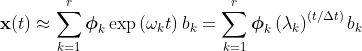

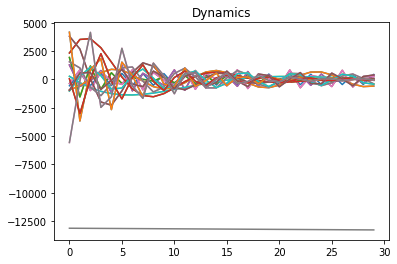

(29, 30)
(29, 29)


array([[ 1.00116611e+00, -2.72654103e-02, -9.46737025e-02,
        -5.10997782e-03, -2.32004054e-02, -6.26672027e-02,
         3.64670169e-03, -1.92893953e-02,  2.64746228e-02,
        -1.10868557e-01, -7.60212064e-03, -3.76136037e-02,
        -1.57228738e-01,  3.58698911e-03, -7.34956604e-03,
         2.13468800e-01,  1.39820097e-01, -6.07329673e-02,
        -2.03904919e-01,  1.59767901e-01, -5.35482704e-02,
         8.04656706e-02, -9.33455980e-02, -2.31363712e-01,
         2.90473317e-01, -5.94846152e-02,  3.19299257e-01,
        -1.02688338e-01, -8.48563143e-02],
       [ 6.16717802e-03,  3.61686479e-01,  3.59088757e-01,
        -2.58604584e-01,  1.80164843e-01, -1.06943437e-01,
         7.97338145e-01, -5.99298470e-01, -4.07073923e-01,
        -2.16628982e-01,  4.04541275e-01, -3.98832327e-02,
         1.25799747e+00,  1.30288415e+00, -5.35767009e-01,
         1.08186040e+00,  6.84740183e-01,  4.93793450e-01,
        -1.57198471e+00,  1.28651440e+00,  1.86517459e+00,
         1.29

In [37]:
for dynamic in dmd.dynamics[:-1]:
    plt.plot(t, dynamic)
    plt.title('Dynamics')
plt.show() # Get the time evolution of each mode; the matrix that contains all the time evolution, stored by row.
print(dmd.dynamics.shape)
print(dmd.atilde.shape)
display(dmd.atilde) # reduced Koopman operator A = A tilde.